In [3]:
import cv2
import matplotlib.pyplot as plt 

In [4]:
image_path = 'input_image.jpg'
img = cv2.imread(image_path)
img

array([[[224, 209, 200],
        [223, 208, 199],
        [224, 209, 200],
        ...,
        [219, 194, 190],
        [218, 193, 189],
        [220, 193, 189]],

       [[221, 206, 197],
        [221, 206, 197],
        [223, 208, 199],
        ...,
        [221, 196, 192],
        [221, 196, 192],
        [221, 194, 190]],

       [[220, 205, 196],
        [220, 205, 196],
        [222, 207, 198],
        ...,
        [217, 193, 187],
        [217, 193, 187],
        [219, 193, 187]],

       ...,

       [[  6,   6,   0],
        [  6,   6,   0],
        [  6,   6,   0],
        ...,
        [  7,   6,   2],
        [  7,   6,   2],
        [  7,   5,   4]],

       [[  6,   6,   0],
        [  6,   6,   0],
        [  6,   6,   0],
        ...,
        [  7,   5,   4],
        [  7,   5,   4],
        [  7,   5,   4]],

       [[  6,   6,   0],
        [  6,   6,   0],
        [  6,   6,   0],
        ...,
        [  7,   5,   4],
        [  7,   5,   4],
        [  7,   5,   4]]

In [5]:
img.shape

(4000, 2667, 3)

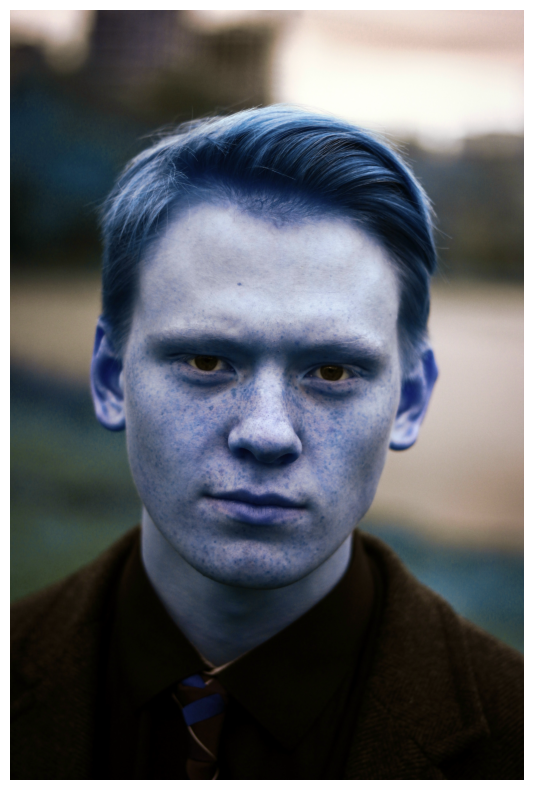

In [6]:
plt.figure(figsize=(20,10))
plt.imshow(img)
plt.axis('off')
plt.show()

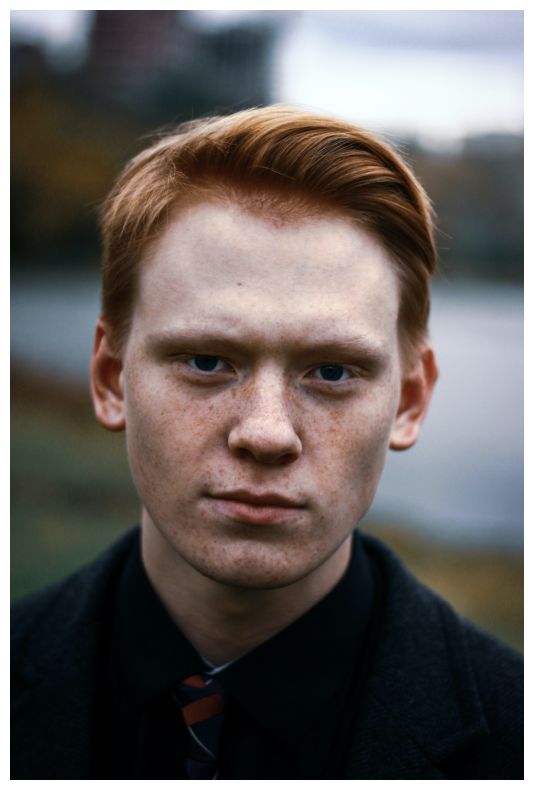

In [7]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,10))
plt.imshow(img)
plt.axis('off')
plt.show()

In [8]:
gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


In [9]:
gray_image.shape

(4000, 2667)

In [10]:
img_resize = cv2.resize(gray_image,(800,800))
img_resize.shape

(800, 800)

In [11]:
cv2.imshow('window', img_resize)
cv2.waitKey(0)

-1

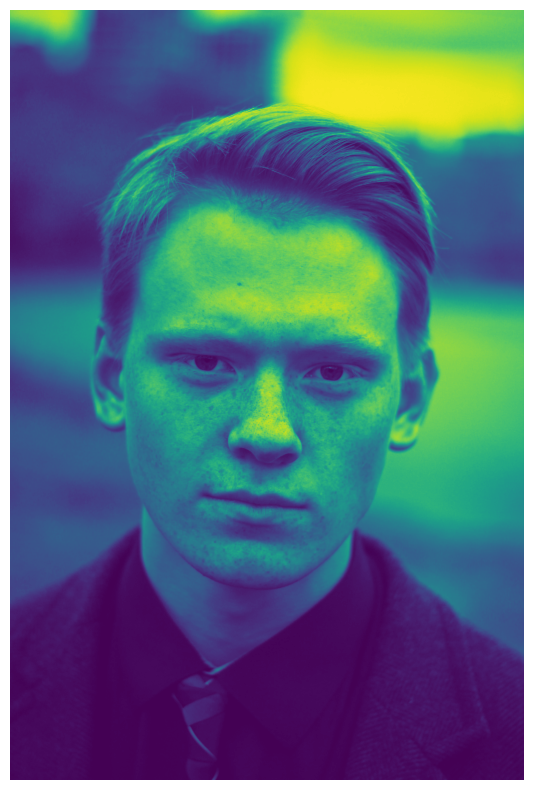

In [12]:
plt.figure(figsize=(20,10))
plt.imshow(gray_image)
plt.axis('off')
plt.show()

In [13]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [14]:
face = face_classifier.detectMultiScale(img)
face

array([[ 408, 1153, 1821, 1821]])

In [15]:
face = face_classifier.detectMultiScale(
    img_resize, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

In [16]:
for (x, y, w, h) in face:
    cv2.rectangle(img_resize, (x, y), (x + w, y + h), (0, 255, 0), 4)

In [17]:
cv2.imshow('window', img_resize)
cv2.waitKey(0)

-1

<function matplotlib.pyplot.show(close=None, block=None)>

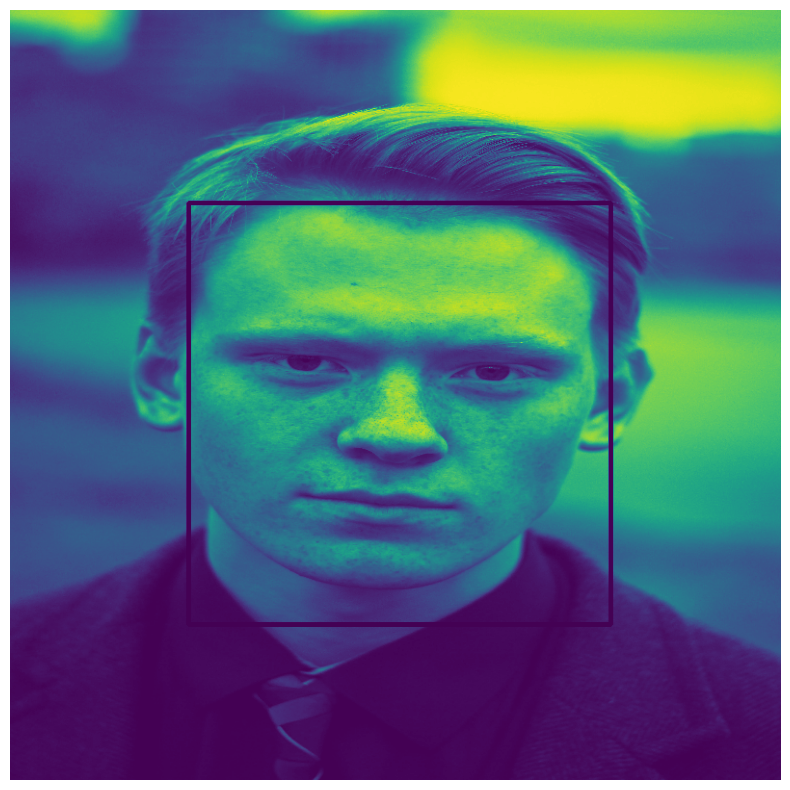

In [18]:
img_rgb = cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(img_resize)
plt.axis('off')
plt.show


In [19]:
image2 = cv2.imread("people1.jpg")


In [32]:
image = cv2.resize(image2, (600,600))
image.shape 

(600, 600, 3)

In [33]:
cv2.imshow('window', image)
cv2.waitKey(0)

-1

In [34]:
image_gray = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
image_gray.shape

(600, 600)

In [35]:
face2 = face_classifier.detectMultiScale(image_gray)
face2

array([[ 81, 126,  49,  49],
       [354, 125,  52,  52],
       [286, 236,  62,  62],
       [ 65, 241,  57,  57]])

In [36]:
for (x, y, w, h) in face2:
    cv2.rectangle(image_gray, (x, y), (x + w, y +h), (0, 255, 255), 5)
cv2.imshow('window', image_gray)
cv2.waitKey(0)

-1

In [37]:
face_classifier1 = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [38]:
video_capture = cv2.VideoCapture(0)

In [39]:
def detect_bounding_box(vid):
    gray_image = cv2.cvtColor(vid, cv2.COLOR_BGR2GRAY)
    faces = face_classifier1.detectMultiScale(gray_image, 1.1, 5, minSize=(40, 40))
    for (x, y, w, h) in faces:
        cv2.rectangle(vid, (x, y), (x + w, y + h), (0, 255, 0), 4)
    return faces

In [40]:
while True:

    result, video_frame = video_capture.read() 
    if result is False:
        break  
    
    faces = detect_bounding_box(
        video_frame
    )  

    cv2.imshow(
        "My Face Detection Project", video_frame
    )
    
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

video_capture.release()
cv2.destroyAllWindows()